### To hide cells, use the code below, add the "hide_toggle()" to a cell to enable it.

### Another method is using tags and running: 

jupyter nbconvert Projeto_Final.ipynb --TagRemovePreprocessor.remove_input_tags='{"remove"}'

on the terminal.

https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook

In [14]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

# ICD - Projeto Final: Gun Violence

## Introdução

Neste trabalho vamos analisar características de incidentes com armas.

## Motivação

A motivação pelo trabalho veio de uma questão polêmica atual no Brasil sobre a legalização de armas. 
Para entender melhor o que o porte pode trazer, resolveu-se analisar dados de um país que tenha porte de arma liberado, os Estados Unidos da América, sendo assim será utilizada uma base que registra incidentes com arma de fogo através dos anos, começando em 2013 e seguindo até 2018.

## Perguntas

1 - Qual a influência das leis sobre o número de incidentes com armas nos EUA?
    - É perceptível/indicativo pelos estados que possuém mais leis ativas?
2 - Qual a influência das leis sobre o número de mortos em incidentes com armas nos EUA?

3 - Qual a influência das leis sobre o número de feridos em incidentes com armas nos EUA?

## Dados Utilizados

Para a realização deste projeto, foi necessário utilizar alguns conjuntos de dados de domínio público. Nesta seção iremos entrar em mais detalhes sobre as bases utilizadas.

### Gun Violence
Fonte: [Gun Violence Data - James Ko](https://www.kaggle.com/jameslko/gun-violence-data)

### State Population Totals and Components of Change: 2010-2018
Fonte: [United States Census Bureau](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html)

### Gun Laws
Foi montada um csv a partir dos dados.
Fonte: [United States Gun laws](https://www.washingtonpost.com/graphics/2017/national/assault-weapons-laws/?noredirect=on&utm_term=.cd3a0a40e5b2)

## Limpeza dos Dados

As bases de dados selecionadas possuem alguns dados nos quais não estamos interessados e que podemos remover para melhorar o desempenho e facilitar o trabalho.
Além disso algumas estão faltando informações ou possuem uma formatação não muito adequada

## Análise Exploratória

### Como é a distribuição do número de incidentes pelos estados dado todos os anos?
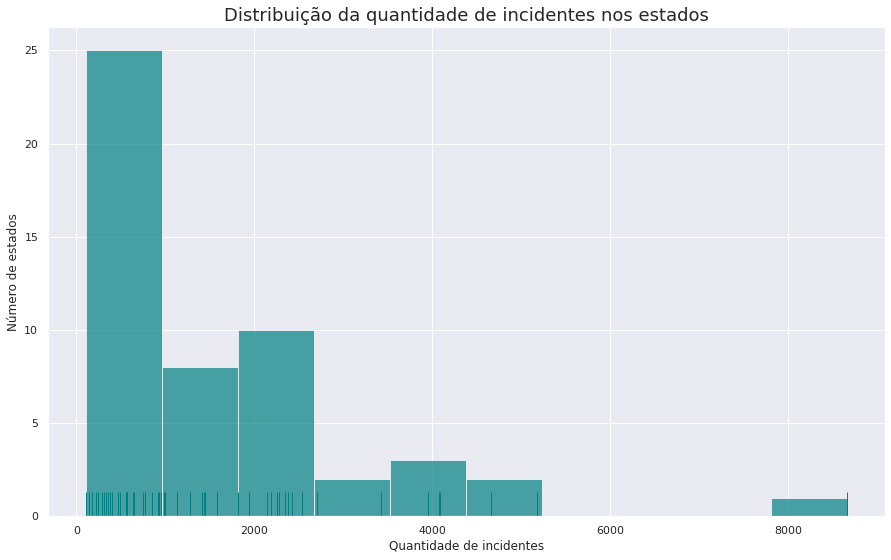
__Podemos observar que cerca de 50% dos estados tiveram até 1000 incidentes.__

### Como é a distribuição dos incidentes pelos estados?
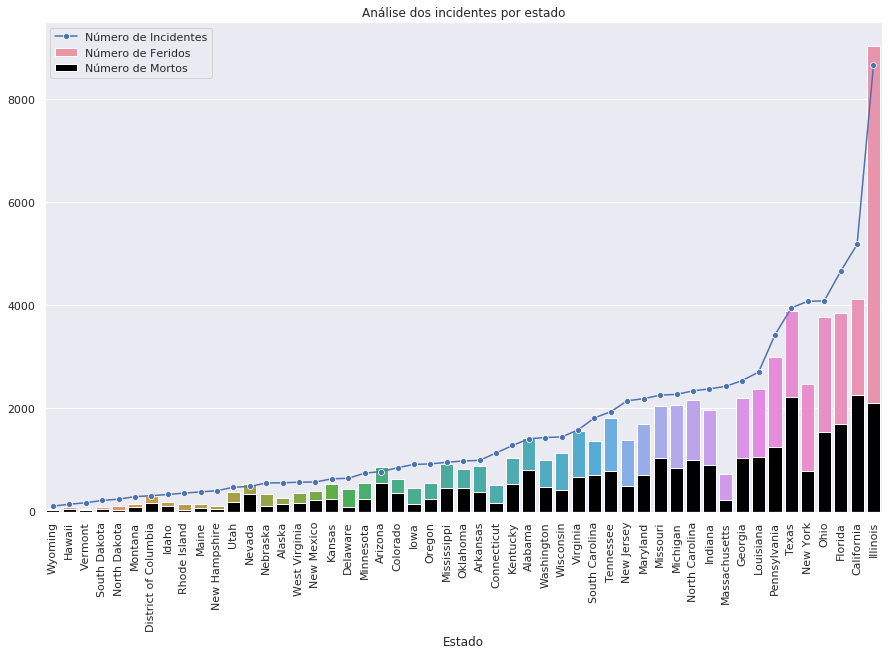

__Agora temos uma visão específica dos estados, observando qual estado era nosso outlier no histograma.__

### Como é essa distribuição pelos estados ao longo dos anos de 2014 a 2017?
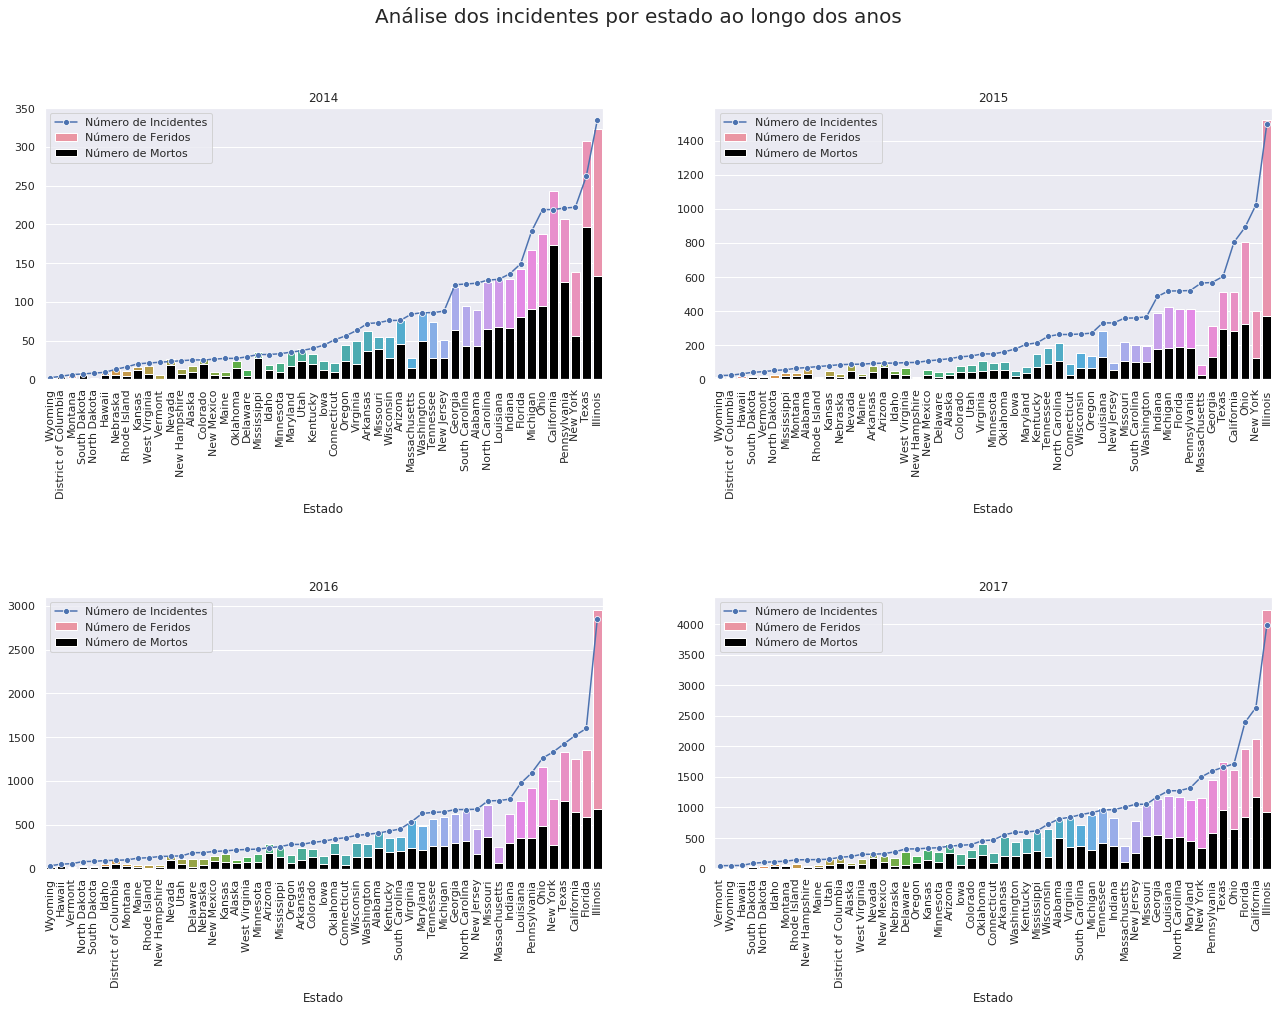

__Podemos observar que foi em 2015 que o outlier pulou para frente dos demais estados, apesar de já ser o com maior número de incidentes no ano anterior.__

### Incidentes per capita
__Um fator importante a se notar é que a distriuição populacional não é igual entre os estados. Dado esse conhecimento, vamos observar essa distribuição de incidentes levando em consideração Incidentes per capita.__
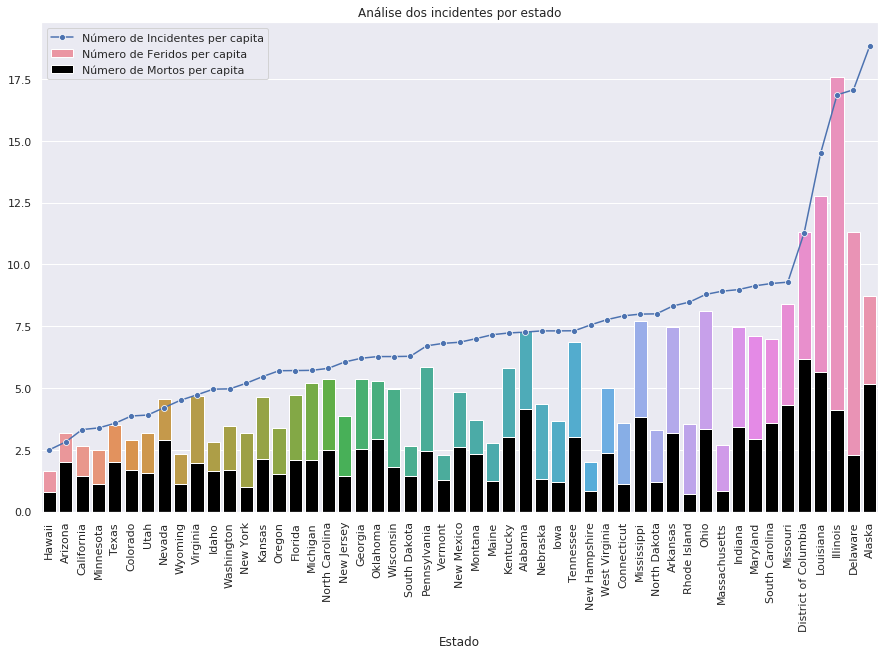

__Apesar do número maior de incidentes, podemos ver que levando em consideração a população do estado, Illinois  não é o estado com mais incidentes per capita, sendo agora o estado do Alaska.__

### Incidentes per capita através dos anos
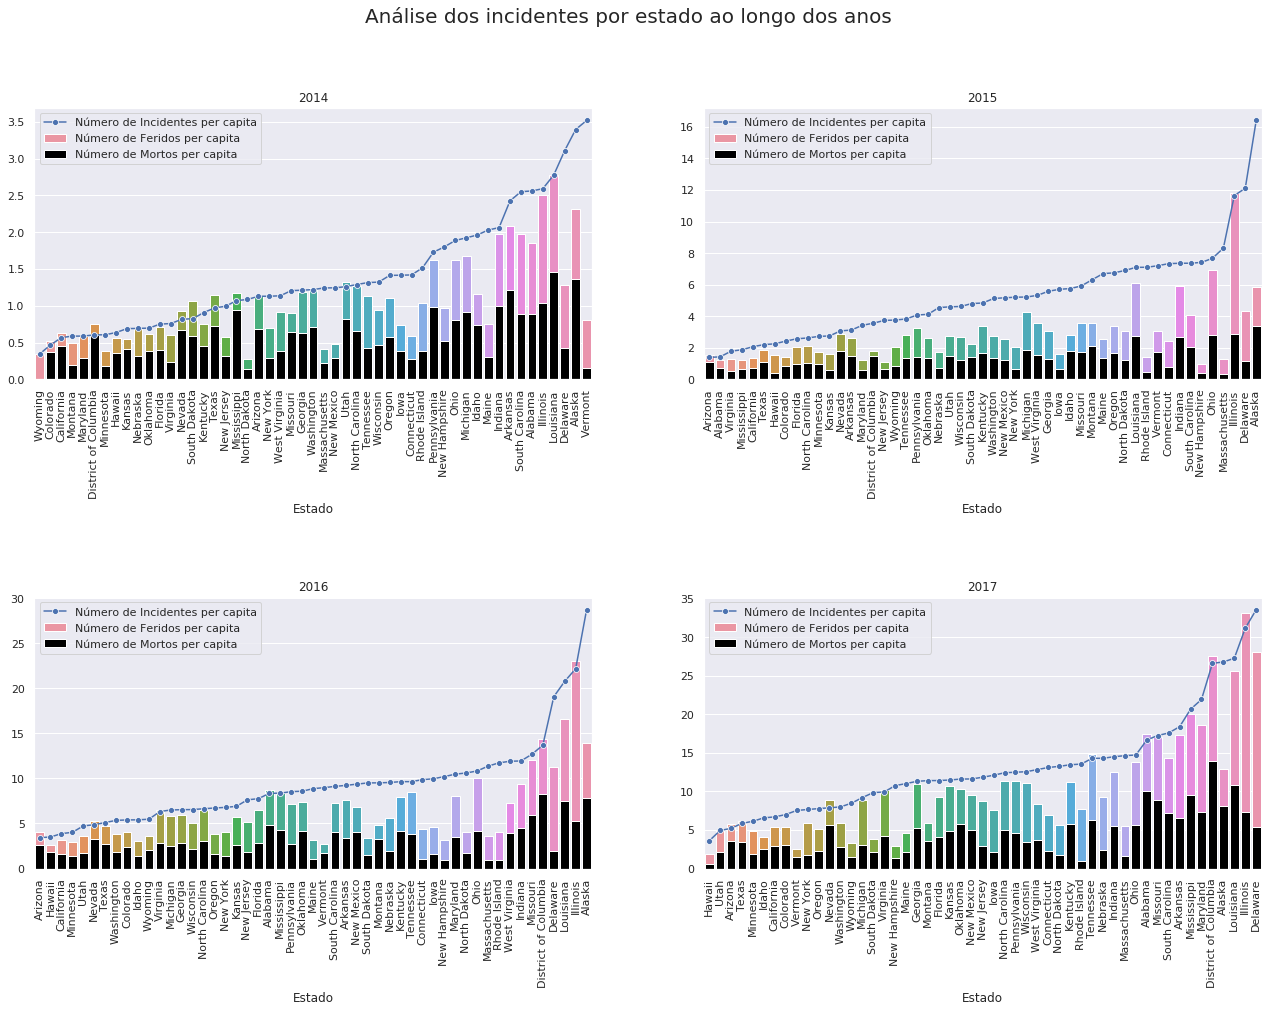
__Podemos ver que foi em 2015 e 2016 o salto do estado de Alaska em incidentes per capita.__

### Qual o perfil de idade dos envolvidos nos incidentes?
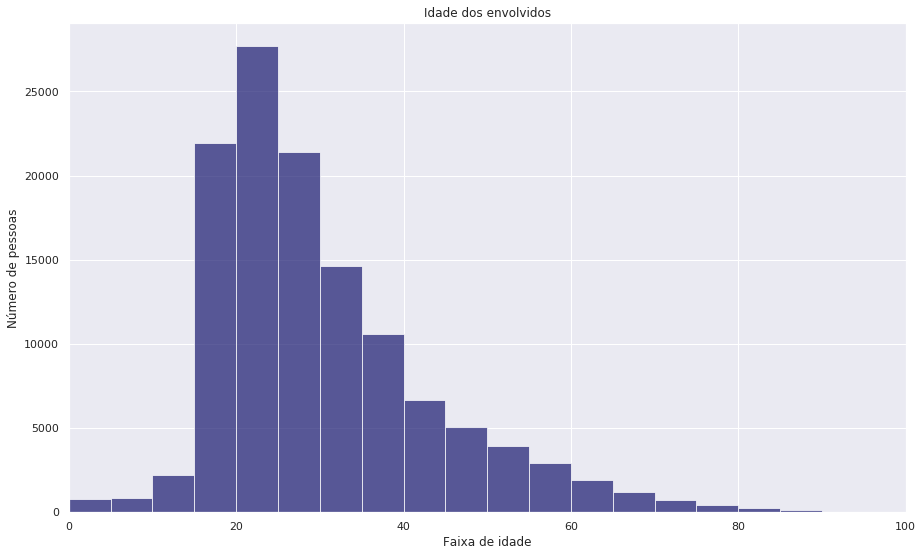

__Existe uma forte concentração na faixa dos 15 a 30 anos, grande parte dos envolvidos é jovem.__

### Qual a tendência do número de incidentes?
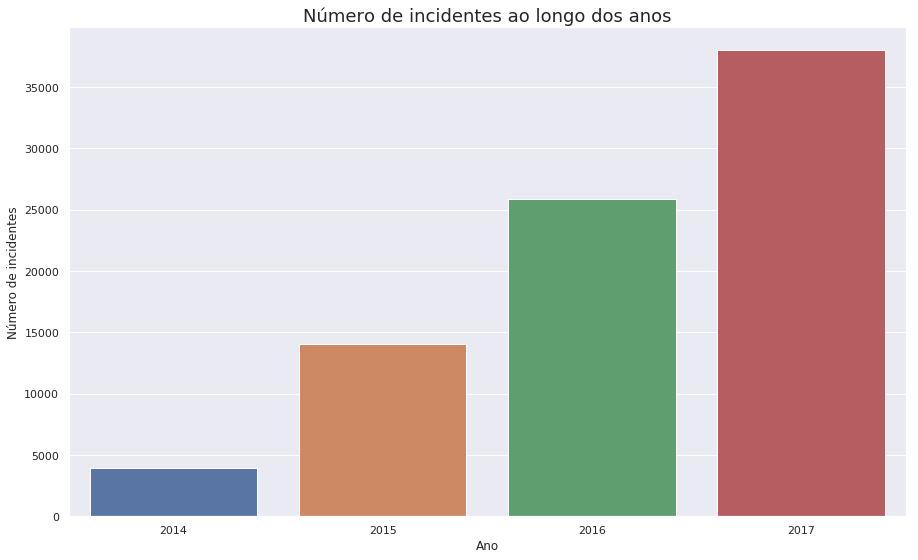

__Há um crescimento significativo com o passar do tempo.__

### Em um dado ano, como estão distribuídos os incidentes?
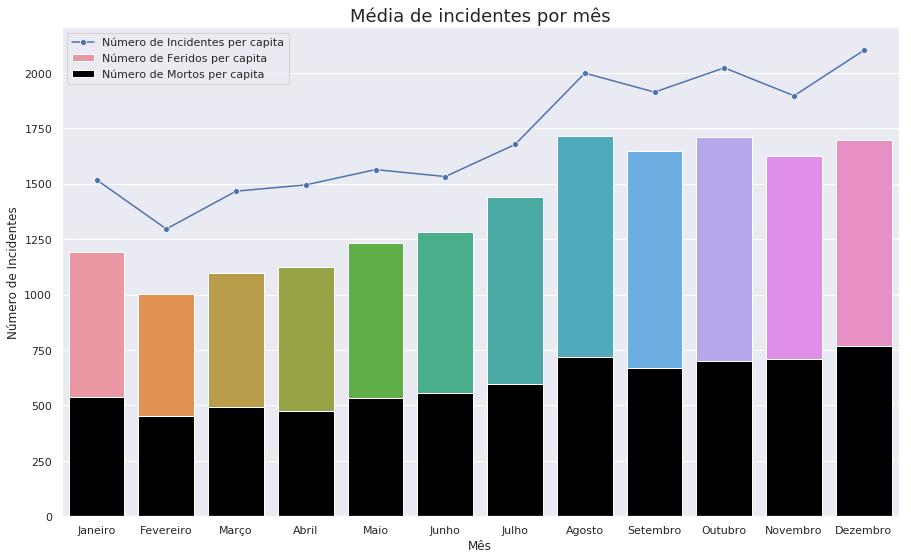
__Dezembro e Outubro são os meses com maior número médio de incidentes, ultrapassando 2000 incidentes por ano em média.
Fevereiro é o mês com menor número de incidentes, tendo em média pouco mais de 1250 incidentes a cada ano.
É possível perceber uma tendência de mais incidentes no segundo semestre do ano.__

### E ao longo dos anos, como é essa distribuição mensal?
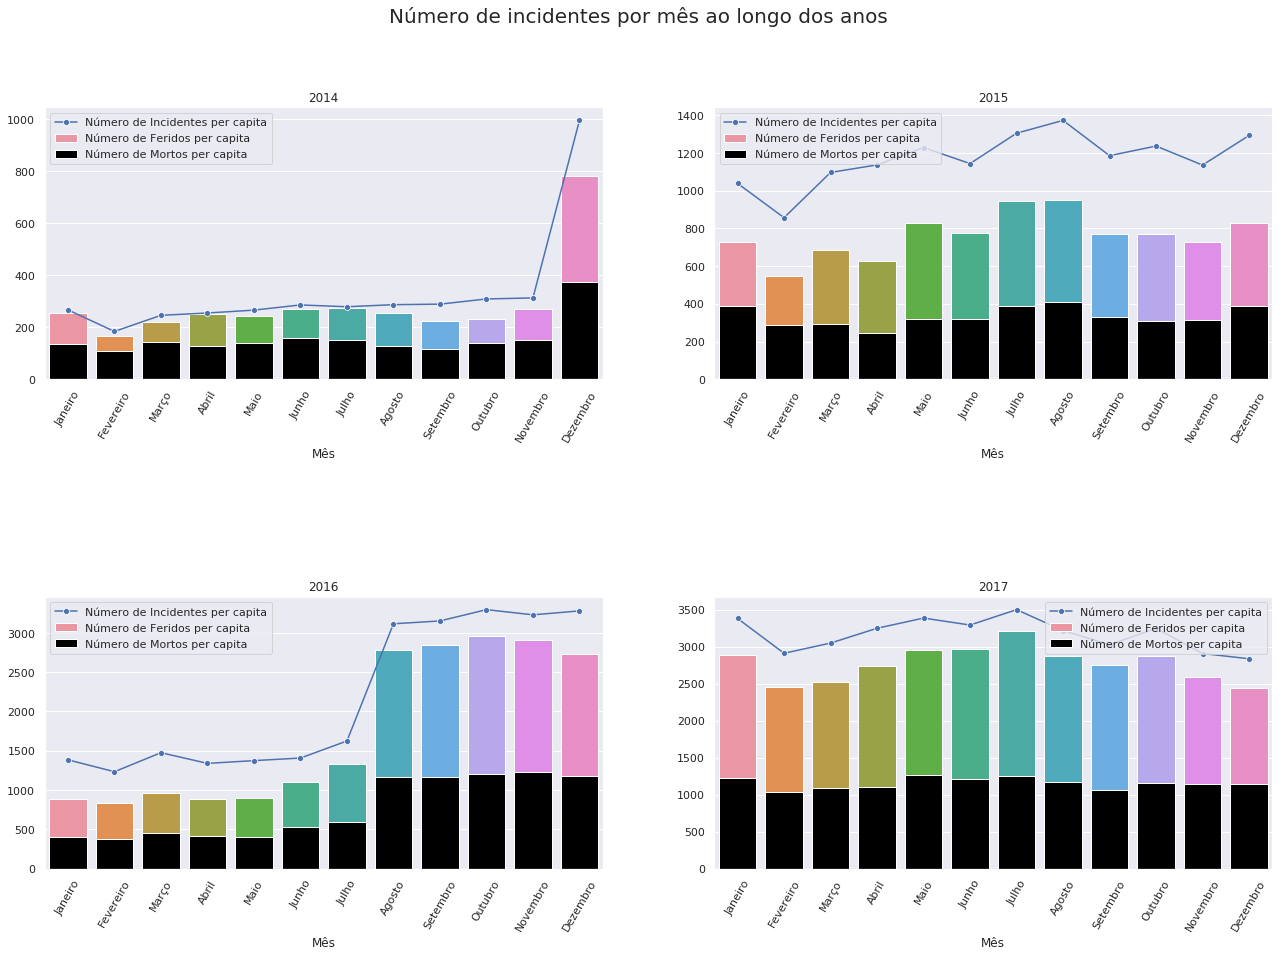
__Não existe um padrão claro ao longo do tempo, mas é interessante como existe sempre um certo foco nos meses de feriado/férias, Dezembro/Janeiro e Julho/Agosto.__

### Time series ao longo de todos os dias dos anos:
#### 2014
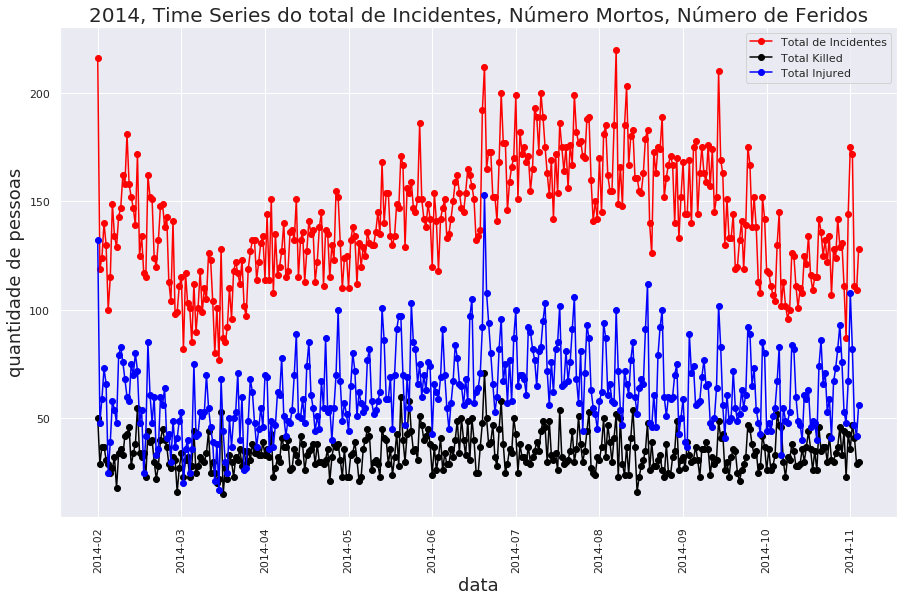

#### 2015
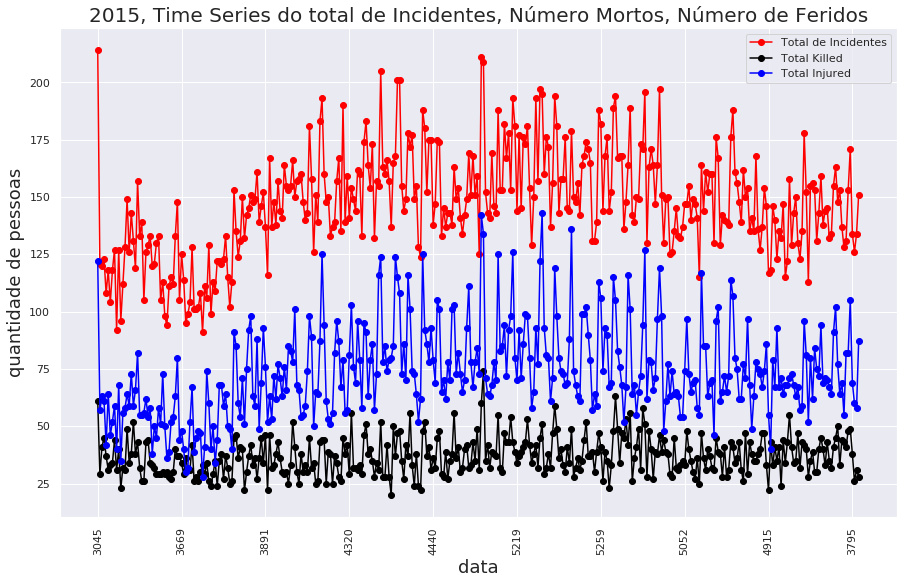

#### 2016
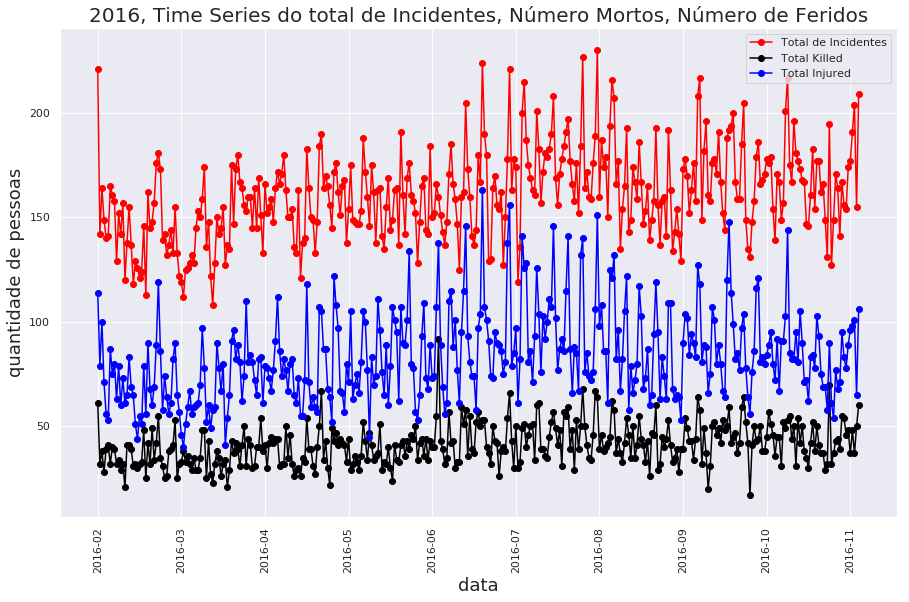

#### 2017
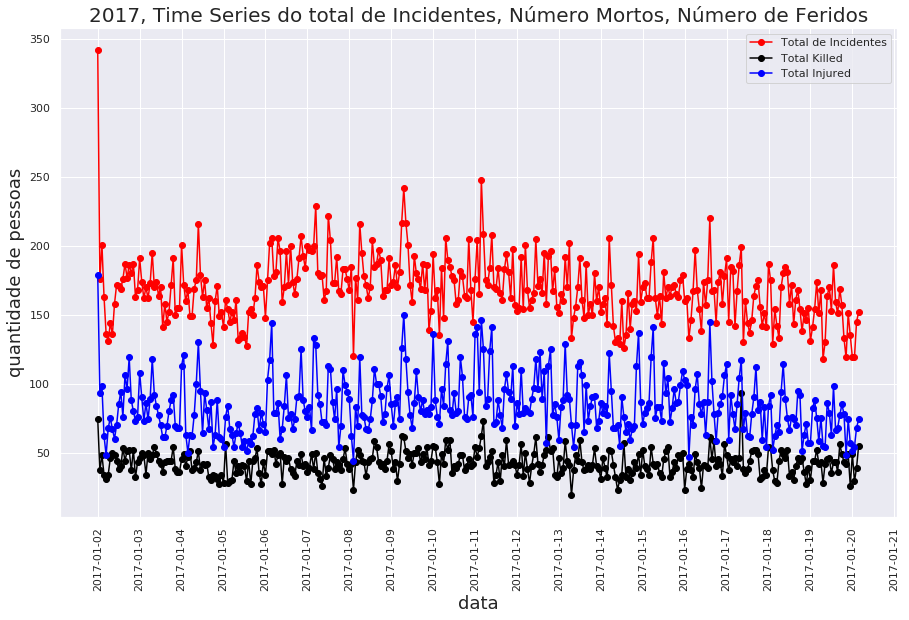

#### Todos os anos
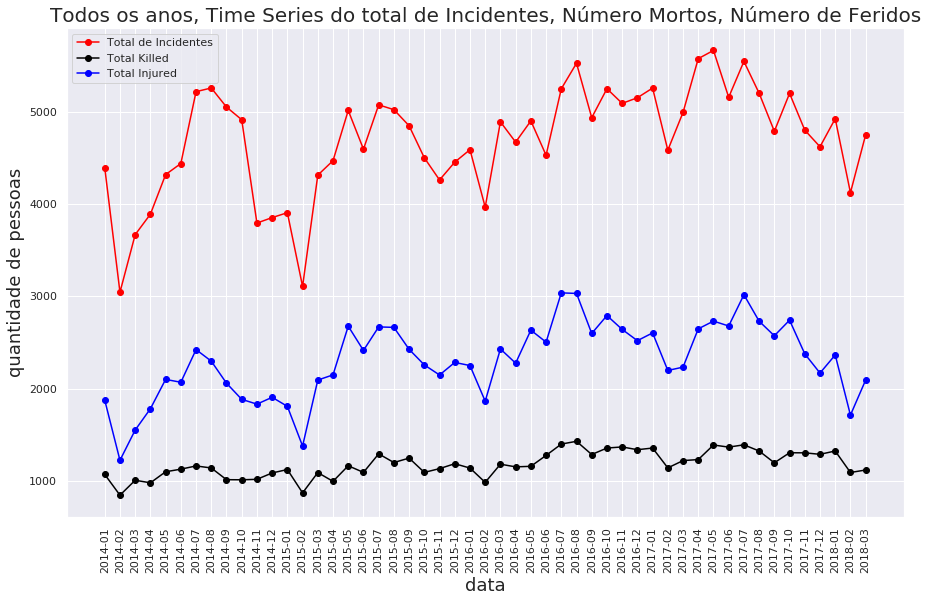

## Testes de Hipótese

## Regressão

## Classificação